# 1. Business Understanding

## 1.1 Objective
Predict the handwrite digit.

## 1.2 Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.



[Description from Kaggle's Digit Recognizer competition](https://www.kaggle.com/c/digit-recognizer)

# 2. Data Understanding

## 2.1 Import Libraries

First, We need to import necessary python libraries which will be used in this project. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Review the data
Observe the data distribution and plot the visualization to observe the relationship between variables and survival.

In [5]:
train_set = pd.read_csv('../Digit Recognizer/train.csv')
test_set = pd.read_csv('../Digit Recognizer/test.csv')

print("train_set shape:", train_set.shape)
print("test_set shape:", test_set.shape)


train_set.head()

train_set shape: (42000, 785)
test_set shape: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_set.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking Missing Data

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
train_set.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


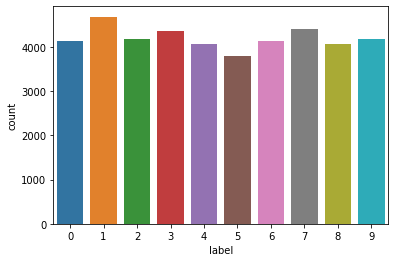

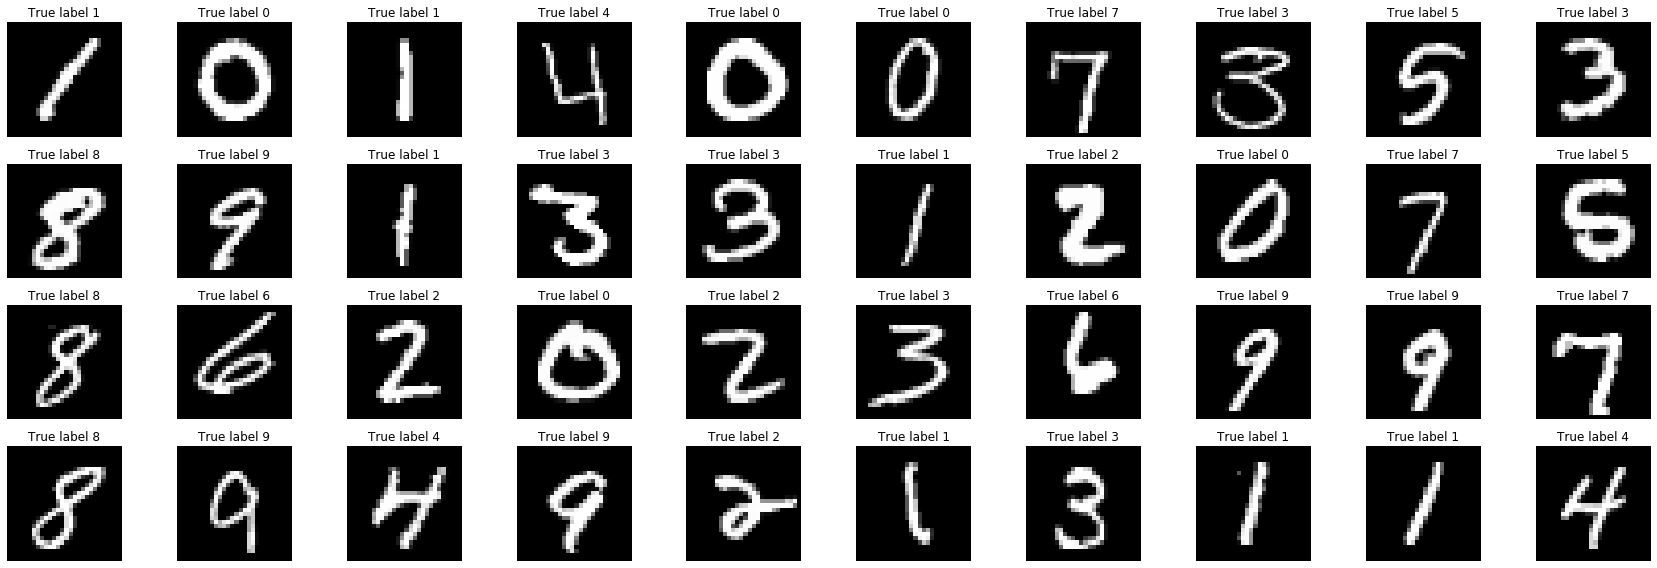

In [10]:
sns.countplot(train_set.iloc[:,0])

plt.figure(figsize=(24,8))
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.axis("off")
    plt.title("True label " + str(train_set.iloc[i,0]))
    plt.imshow(train_set.iloc[i,1:].values.reshape(28,28), cmap='gray')
plt.tight_layout()

# 3. Preprocessing

## 3.1 Splitting train set and validation set

Because the test set is given by Kaggle, only the train set needs to be split to the train set and validation set.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set.iloc[:,1:], train_set.iloc[:,0], test_size=0.2)
X_train_2 = X_train
X_test_2 = X_test
standardscaler = StandardScaler()
standardscaler.fit(X_train)
X_train = standardscaler.transform(X_train)
X_test = standardscaler.transform(X_test)

print(X_train)
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 3.2 Convert the target variable to matrix format, which will help the subsequent processing

In [21]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


# 4 Modeling

Began to enter the field of deep learning, will use Keras to build neural network models

## 4.1 Neural Network model
In this step, the multilayer neural network is used to predict the result, let's see how is the performance of this model.

### 4.1.1 Setting the multilayer neural network model

In [22]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

model = Sequential()
model.add(Dense(250, activation = "relu", input_shape=(784,)))
model.add(Dropout(0.25))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer="Adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 250)               196250    
_________________________________________________________________
dropout_10 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               25100     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


### 4.1.2 Fitting the MLP model

In [23]:
model_result = model.fit(X_train, y_train, batch_size=50, epochs=4, validation_data=(X_test, y_test))

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

Train on 33600 samples, validate on 8400 samples
Epoch 1/4
33600/33600 [==============================] - 8s 237us/step - loss: 0.4147 - acc: 0.8798 - val_loss: 0.1807 - val_acc: 0.9483 loss: 0.4240 - acc
Epoch 2/4
33600/33600 [==============================] - 7s 222us/step - loss: 0.2113 - acc: 0.9379 - val_loss: 0.1470 - val_acc: 0.9561
Epoch 3/4
33600/33600 [==============================] - 7s 220us/step - loss: 0.1609 - acc: 0.9518 - val_loss: 0.1349 - val_acc: 0.9623
Epoch 4/4
33600/33600 [==============================] - 7s 213us/step - loss: 0.1354 - acc: 0.9585 - val_loss: 0.1254 - val_acc: 0.9643
(33600, 28, 28, 1)
(8400, 28, 28, 1)


## 4.2 CNN model
Now, the CNN model will be built in this step. CNN model is the great algorithm in computer vision. The data will be processed by three main step. After the Convolution and Max pooling, data will go through the Flatten step and then input into the multi-layer neural network to predict the final result.

### 4.2.1 Setting CNN model

In [24]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

CNNmodel = Sequential()
CNNmodel.add(Convolution2D(32, (3,3), strides=(1,1), padding="same", input_shape=(28,28,1), activation="relu"))
CNNmodel.add(Convolution2D(32, (3,3), strides=(1,1), padding="same", activation = "relu"))
CNNmodel.add(MaxPooling2D(pool_size=(2,2), padding="same"))
CNNmodel.add(Dropout(0.25))

CNNmodel.add(Convolution2D(64, (3,3), strides=(1,1), padding="same", activation = "relu"))
CNNmodel.add(Convolution2D(64, (3,3), strides=(1,1), padding="same", activation = 'relu'))
CNNmodel.add(MaxPooling2D(pool_size=(2,2), padding = "same"))
CNNmodel.add(Dropout(0.25))

CNNmodel.add(Flatten())
CNNmodel.add(Dense(128, activation="relu"))
CNNmodel.add(Dropout(0.5))
CNNmodel.add(Dense(10, activation = "softmax"))
CNNmodel.compile(optimizer="adam", loss=categorical_crossentropy, metrics=["accuracy"])
CNNmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### 4.2.2 Train the model and plot the accuracy of each epochs

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 36s 1ms/step - loss: 0.2845 - acc: 0.9129 - val_loss: 0.0657 - val_acc: 0.9818
Epoch 2/5
33600/33600 [==============================] - 34s 1ms/step - loss: 0.0970 - acc: 0.9707 - val_loss: 0.0533 - val_acc: 0.9844
Epoch 3/5
33600/33600 [==============================] - 23s 681us/step - loss: 0.0711 - acc: 0.9786 - val_loss: 0.0424 - val_acc: 0.9881
Epoch 4/5
33600/33600 [==============================] - 25s 741us/step - loss: 0.0582 - acc: 0.9831 - val_loss: 0.0458 - val_acc: 0.9881
Epoch 5/5
33600/33600 [==============================] - 27s 807us/step - loss: 0.0512 - acc: 0.9844 - val_loss: 0.0386 - val_acc: 0.9904
Key: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


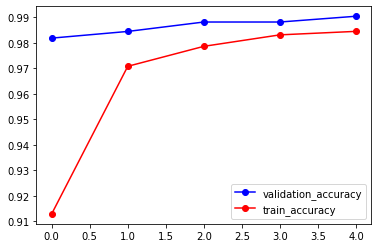

In [26]:
CNNmodel_result = CNNmodel.fit(X_train, y_train, batch_size=30, epochs=5, validation_data=(X_test, y_test))
CNNmodel_final = CNNmodel.predict_classes(X_test, batch_size=30)
print("Key:", CNNmodel_result.history.keys())
plt.plot(CNNmodel_result.history["val_acc"], "bo-", label="validation_accuracy")
plt.plot(CNNmodel_result.history["acc"], "ro-", label = "train_accuracy")
plt.legend()

### 4.2.3 Use confusion matrix to compare the difference between the predicted result and the actual

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,836,0,1,0,1,0,4,0,1,0
1,0,947,2,0,0,0,0,2,1,0
2,0,0,809,2,0,0,1,4,1,0
3,1,0,2,912,0,5,0,1,2,1
4,0,1,0,0,791,0,0,1,1,12
5,0,0,1,4,0,742,0,0,0,0
6,1,0,1,0,1,2,755,0,0,0
7,1,0,2,0,0,0,0,910,0,0
8,0,1,2,2,0,1,1,0,809,4


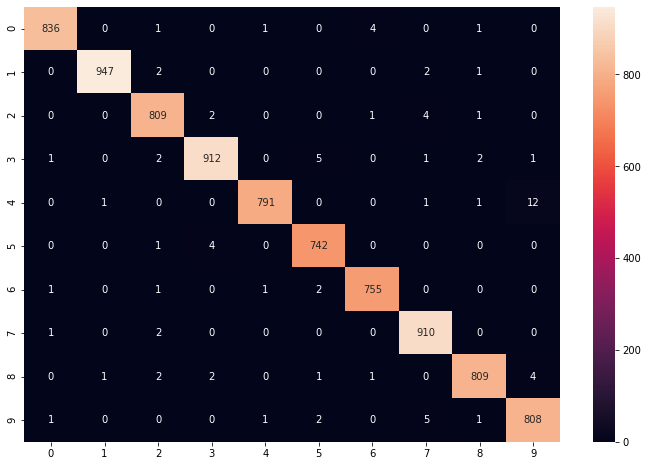

In [27]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(np.argmax(y_test,axis=1), CNNmodel_final)
plt.figure(figsize=(12,8))
sns.heatmap(confusion, annot=True, fmt='d')

pd.crosstab(np.argmax(y_test, axis=1), CNNmodel_final, rownames = ["label"], colnames=["predict"])

### 4.2.4 Plotting the digit that were predicted incorrectly

The amount of error =  81


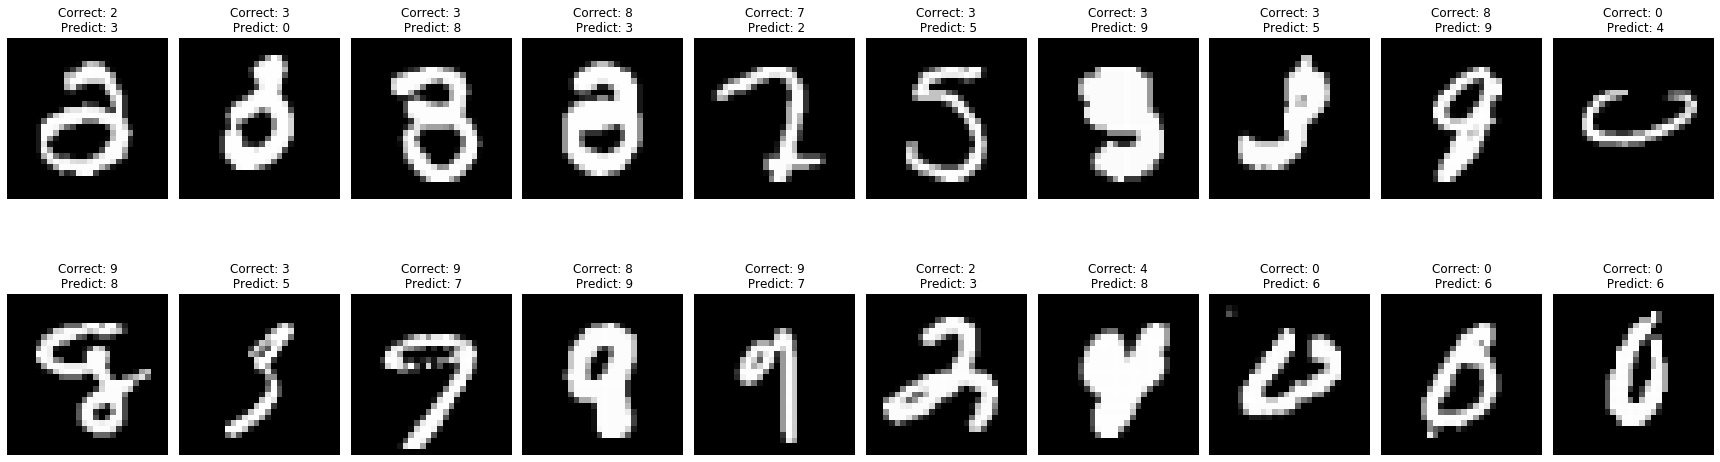

In [28]:
error = ~np.equal(np.argmax(y_test, axis=1), CNNmodel_final)
print("The amount of error = ", error.sum())
plt.figure(figsize = (24,8))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.axis("off")
    plt.title("Correct: "+str(np.argmax(y_test[error][i])) + "\n Predict: " +str(CNNmodel_final[error][i]))
    plt.imshow(X_test_2[error].iloc[i,:].values.reshape(28,28), cmap=("gray"))
plt.tight_layout()

### 4.2.4 Using 'fit_generator' train the model

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

learning_rate_r = ReduceLROnPlateau(monitor = "val_acc",
                                    patience=3,
                                    verbose=1,
                                    factor=0.5,
                                    min_lr=0.00001)

data_generate = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
data_generate.fit(X_train)

CNNmodel.fit_generator(data_generate.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train)/32,
                       validation_data=(X_test, y_test), epochs=30, callbacks=[learning_rate_r])

Epoch 1/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.7025 - acc: 0.7714 - val_loss: 0.1017 - val_acc: 0.9707
Epoch 2/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.3498 - acc: 0.8922 - val_loss: 0.0996 - val_acc: 0.9714
Epoch 3/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.2779 - acc: 0.9151 - val_loss: 0.0930 - val_acc: 0.9738
Epoch 4/30
1050/1050 [==============================] - 19s 18ms/step - loss: 0.2505 - acc: 0.9248 - val_loss: 0.0886 - val_acc: 0.9763
Epoch 5/30
1050/1050 [==============================] - 19s 18ms/step - loss: 0.2150 - acc: 0.9345 - val_loss: 0.0707 - val_acc: 0.9807
Epoch 6/30
1050/1050 [==============================] - 19s 18ms/step - loss: 0.2087 - acc: 0.9382 - val_loss: 0.0746 - val_acc: 0.9779
Epoch 7/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.1942 - acc: 0.9430 - val_loss: 0.0777 - val_acc: 0.9780
Epoch 8/30
1050/1050 [==========================

## 4.3 Final model

The amount of error =  112


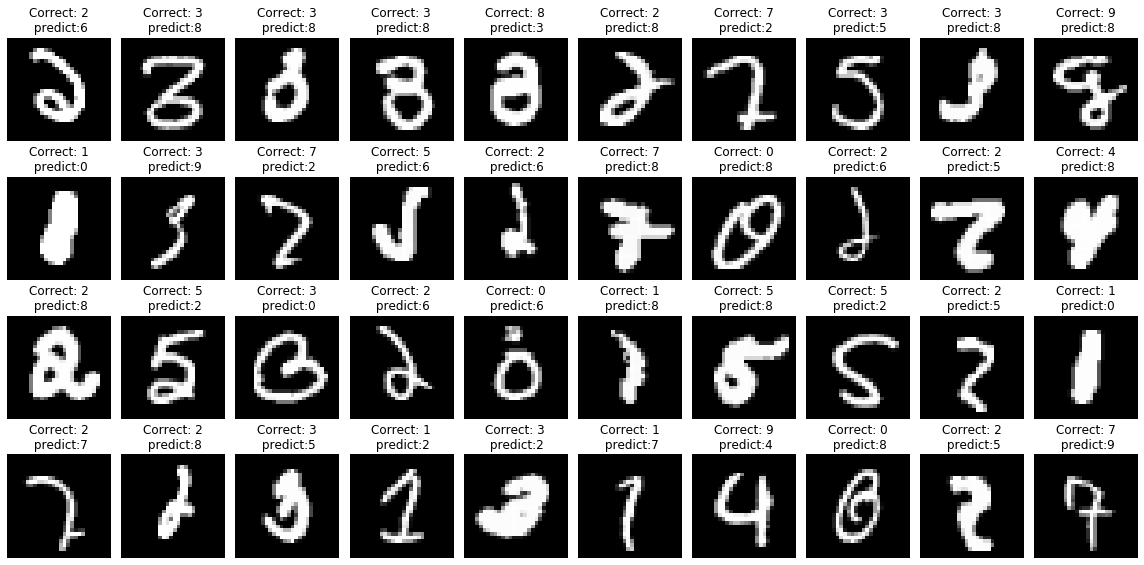

In [32]:
CNNmodel_final = CNNmodel.predict_classes(X_test, batch_size=30)
error = ~np.equal(np.argmax(y_test, axis=1), CNNmodel_final)
print("The amount of error = ", error.sum())
plt.figure(figsize=(16,8))
for i in range(40):
    plt.subplot(4, 10, i+1)
    plt.axis("off")
    plt.title("Correct: " + str(np.argmax(y_test[error][i])) + "\n predict:" + str(CNNmodel_final[error][i]))
    plt.imshow(X_test_2[error].iloc[i,:].values.reshape(28,28), cmap="gray")
plt.tight_layout()

# 5. Submit

In [ ]:
submit_test = standardscaler.transform(test_set)
submit_test = submit_test.reshape(-1,28,28,1)
CNNmodel_final = CNNmodel.predict_classes(submit_test)

submit = pd.DataFrame()
submit['ImageId'] = np.arange(1, len(CNNmodel_final)+1, 1)
submit['Label'] = CNNmodel_final
submit.columns=['ImageId','Label']
submit.to_csv('submit.csv',index=False)